<a href="https://colab.research.google.com/github/HongSeongMo/Bigdata_Analysis_Professional/blob/main/241017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/usedcars.csv', encoding='euc-kr',header=0, index_col=0)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,year,fuel,km,price,maker
1,현대 제네시스 BH330 럭셔리 프라임팩,08/09(09년형),가솔린,260000.0,690,현대
2,제네시스 더 올 뉴 G80 3.5 T-GDi AWD,20/06(21년형),가솔린,10000.0,700,제네시스
3,기아 K7 프리미어 3.0 GDI 시그니처,19/07(20년형),가솔린,20000.0,3350,기아
4,기아 더 뉴 K7 3.0 GDI 프레스티지,01월 15일,가솔린,90000.0,1990,기아
5,현대 갤로퍼2 숏바디 이노베이션 밴 인터쿨러 엑시드,02월 10일,디젤,160000.0,550,현대
...,...,...,...,...,...,...
66,기아 레이 1.0 터보 프레스티지,14/08(15년형),가솔린,60000.0,1050,기아
67,르노삼성 SM7 뉴 아트 프레스티지,09/10(10년형),가솔린,150000.0,590,르노삼성
68,현대 뉴 카운티 장축 SUP 29인승,03월 18일,디젤,50000.0,5580,현대
69,기아 뉴 오피러스 GH270 고급형,07월 03일,가솔린,100000.0,320,기아


In [129]:
dfnew = df[['maker','fuel']]

In [130]:
dfnew

,maker,fuel
1,현대,가솔린
2,제네시스,가솔린
3,기아,가솔린
4,기아,가솔린
5,현대,디젤
...,...,...
66,기아,가솔린
67,르노삼성,가솔린
68,현대,디젤
69,기아,가솔린


In [131]:
crosstable = pd.crosstab(dfnew['maker'],dfnew['fuel'], margins=True)
crosstable

fuel,LPG,가솔린,디젤,전기,All
maker,,,,,
GM대우,0,1,3,0,4
기아,2,11,8,0,21
르노삼성,0,1,1,0,2
쉐보레,0,2,1,0,3
쎄미시스코,0,0,0,1,1
아리아워크스루밴,0,0,1,0,1
오딧,0,0,1,0,1
제네시스,0,9,0,0,9
케이씨,0,0,1,0,1


In [132]:
print(crosstable.loc[['현대'],['디젤']])

fuel   디젤
maker    
현대      9


In [133]:
maker_freq = dfnew['maker'].value_counts()
maker_freq

,count
maker,
현대,27
기아,21
제네시스,9
GM대우,4
쉐보레,3
르노삼성,2
오딧,1
아리아워크스루밴,1
쎄미시스코,1


In [134]:
maker_prop = (dfnew['maker'].value_counts(normalize=True))*100
maker_prop

,proportion
maker,
현대,38.571429
기아,30.000000
제네시스,12.857143
GM대우,5.714286
쉐보레,4.285714
르노삼성,2.857143
오딧,1.428571
아리아워크스루밴,1.428571
쎄미시스코,1.428571


In [135]:
result_df = pd.concat([maker_freq, maker_prop], axis=1)
result_df.columns = ['Frequency','Ratio(%)']
result_df

,Frequency,Ratio(%)
maker,,
현대,27,38.571429
기아,21,30.000000
제네시스,9,12.857143
GM대우,4,5.714286
쉐보레,3,4.285714
르노삼성,2,2.857143
오딧,1,1.428571
아리아워크스루밴,1,1.428571
쎄미시스코,1,1.428571


In [136]:
from collections import Counter
import pandas as pd

In [137]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/usedcars.csv', encoding='euc-kr',header=0, index_col=0)
df

,title,year,fuel,km,price,maker
1,현대 제네시스 BH330 럭셔리 프라임팩,08/09(09년형),가솔린,260000.0,690,현대
2,제네시스 더 올 뉴 G80 3.5 T-GDi AWD,20/06(21년형),가솔린,10000.0,700,제네시스
3,기아 K7 프리미어 3.0 GDI 시그니처,19/07(20년형),가솔린,20000.0,3350,기아
4,기아 더 뉴 K7 3.0 GDI 프레스티지,01월 15일,가솔린,90000.0,1990,기아
5,현대 갤로퍼2 숏바디 이노베이션 밴 인터쿨러 엑시드,02월 10일,디젤,160000.0,550,현대
...,...,...,...,...,...,...
66,기아 레이 1.0 터보 프레스티지,14/08(15년형),가솔린,60000.0,1050,기아
67,르노삼성 SM7 뉴 아트 프레스티지,09/10(10년형),가솔린,150000.0,590,르노삼성
68,현대 뉴 카운티 장축 SUP 29인승,03월 18일,디젤,50000.0,5580,현대
69,기아 뉴 오피러스 GH270 고급형,07월 03일,가솔린,100000.0,320,기아


In [138]:
frequency = Counter(df['maker'])
frequency

Counter({'현대': 27,
         '제네시스': 9,
         '기아': 21,
         '쉐보레': 3,
         '오딧': 1,
         '아리아워크스루밴': 1,
         'GM대우': 4,
         '쎄미시스코': 1,
         '르노삼성': 2,
         '케이씨': 1})

In [139]:
print(type(frequency))

<class 'collections.Counter'>


In [140]:
N= sum(frequency.values())
N

70

In [141]:
for item in frequency:
    print(item, frequency[item], round((frequency[item]/N)*100, 6))
    # print(item)

현대 27 38.571429
제네시스 9 12.857143
기아 21 30.0
쉐보레 3 4.285714
오딧 1 1.428571
아리아워크스루밴 1 1.428571
GM대우 4 5.714286
쎄미시스코 1 1.428571
르노삼성 2 2.857143
케이씨 1 1.428571


In [142]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [143]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [144]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from collections import Counter

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/usedcars.csv', encoding='euc-kr', index_col=0)
df

,title,year,fuel,km,price,maker
1,현대 제네시스 BH330 럭셔리 프라임팩,08/09(09년형),가솔린,260000.0,690,현대
2,제네시스 더 올 뉴 G80 3.5 T-GDi AWD,20/06(21년형),가솔린,10000.0,700,제네시스
3,기아 K7 프리미어 3.0 GDI 시그니처,19/07(20년형),가솔린,20000.0,3350,기아
4,기아 더 뉴 K7 3.0 GDI 프레스티지,01월 15일,가솔린,90000.0,1990,기아
5,현대 갤로퍼2 숏바디 이노베이션 밴 인터쿨러 엑시드,02월 10일,디젤,160000.0,550,현대
...,...,...,...,...,...,...
66,기아 레이 1.0 터보 프레스티지,14/08(15년형),가솔린,60000.0,1050,기아
67,르노삼성 SM7 뉴 아트 프레스티지,09/10(10년형),가솔린,150000.0,590,르노삼성
68,현대 뉴 카운티 장축 SUP 29인승,03월 18일,디젤,50000.0,5580,현대
69,기아 뉴 오피러스 GH270 고급형,07월 03일,가솔린,100000.0,320,기아


In [146]:
frequency = Counter(df.maker)
frequency

Counter({'현대': 27,
         '제네시스': 9,
         '기아': 21,
         '쉐보레': 3,
         '오딧': 1,
         '아리아워크스루밴': 1,
         'GM대우': 4,
         '쎄미시스코': 1,
         '르노삼성': 2,
         '케이씨': 1})

In [147]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt # Import pyplot
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

# Instead of fm._rebuild(), try this:
fm.findSystemFonts(fontpaths=None, fontext='ttf')
# This function updates the font cache with newly installed fonts.
# Refer to Matplotlib documentation for more details on findSystemFonts()

# Then, you can proceed with your plotting code:
# (Assuming your plotting code is in the next cell)
# plt.figure(figsize=(12,5))
# ... rest of your plotting code ...

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


['/usr/share/fonts/truetype/nanum/NanumSquare_acEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic-YetHangul.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSqua

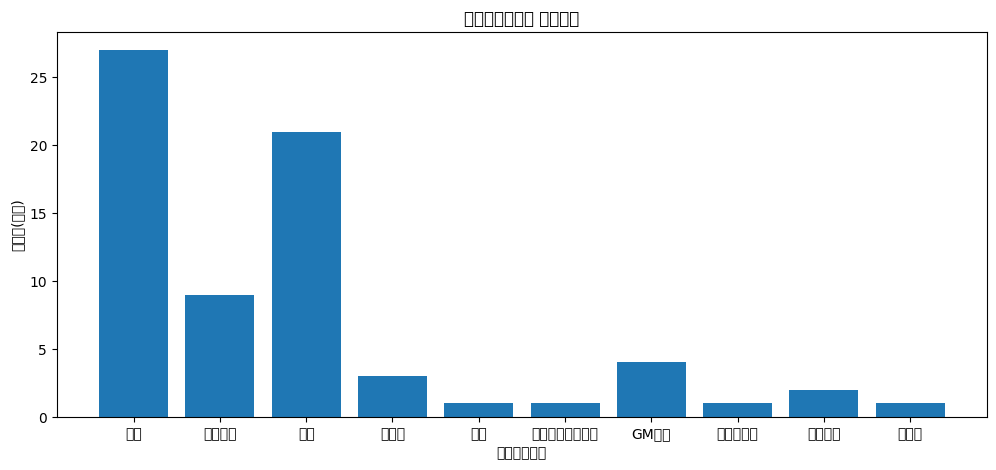

In [148]:
plt.figure(figsize=(12,5))
plt.xlabel('자동차제조사')
plt.ylabel('빈도수(개수)')
plt.title('자동차제조사별 자동차수')
plt.bar(frequency.keys(), frequency.values())
plt.show()

In [149]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm


In [150]:
# font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# font_list

In [151]:
#  print ('설정파일 위치: ', mpl.matplotlib_fname())